# EDA

In this notebook I will clean, explore and visualise the data

# Libraries

In [4]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../Data/dataset1.csv')
df.head()

,Arm length (m),Ball weight (kg),Ball radius (mm),Air temperature (deg C),Spring constant (N per m),Device weight (kg),Target hit
0,0.291903,0.340028,0.013823,18.0,545.348164,4.616101,0.0
1,0.247545,0.521061,0.390693,26.0,356.041022,5.863920,1.0
2,0.483827,0.451309,0.170141,11.0,522.387220,5.020725,1.0
3,0.216393,0.460698,0.101122,20.0,95.025757,4.586624,0.0
4,0.164084,0.391740,0.155177,11.0,104.242640,3.677411,0.0


Index(['Arm length (m)', 'Ball weight (kg)', 'Ball radius (mm)',
       'Air temperature (deg C)', 'Spring constant (N per m)',
       'Device weight (kg)', 'Target hit'],
      dtype='object')

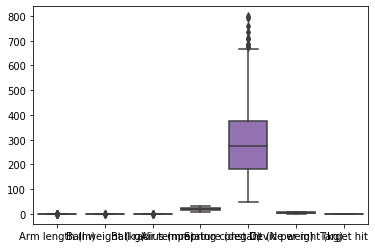

In [5]:
ax = sns.boxplot(data = df)
df.columns

In [4]:
#profile = ProfileReport(df, title="dataset1_report", explorative = True)


In [5]:
#profile.to_file("../Reports/dataset1_report.html")

## Comments

(For reference, please see dataset1_report.html) 

This should be a fairly easy dataset as there are no missing values. It seems to be well structured.

The warnings that are 5 of the attributes have *unique* values. Let's explore this.

**Anaysis:**

From the correlation matrix, we can see that air temperature and device weight have almost no impact on the target. This might lead us to believe that these are actually redundant features.

In fact, they do not seem to have any impact on anything. 

This might lead us to believe that we should actually remove them completely from the dataset, however, the submission rules do not allow this, as they require the whole matrix to be submitted (see check.py).

However, an alternative may be to divide these by values such that they become zero, and thus they may have little to no impact on the neural network (you must test this).

In [6]:
# let's find the scaling values
def scale_data(data, mode = "standard"):
    """
    scales data and outputs the scaling values (scales using standard scaler)
    """
    n_attr = data.shape[1]
    scalers = np.zeros([2,n_attr])
    if mode == "standard":
        scalers[0,:] = data.mean(axis = 0)
        scalers[1,:] = data.std(axis = 0)
        scaled = (data - scalers[0,:]) / scalers[1,:]
    elif mode == "minmax":
        scalers[0,:] = data.min(axis = 0)
        scalers[1,:] = data.max(axis = 0) - scalers[0,:]
        scaled = (data - scalers[0,:]) / scalers[1,:]
    elif mode == "maxabs":
        scalers[0,:] = 0
        scalers[1 :] = abs(data).max(axis = 0)
        scaled = (data) / scalers[1,:]
    
    return scaled, scalers
    

df_scaled, scalers = scale_data(df[df.columns[:-1]], mode = "standard")
print(scalers)
print(df.min(axis =0), '\n',df.max(axis = 0)-df.min(axis = 0))

[[2.99790586e-01 3.10500234e-01 1.61670426e-01 1.88135000e+01
  2.84024574e+02 4.27726820e+00]
 [9.83924728e-02 9.97600486e-02 8.83980565e-02 4.82435021e+00
  1.37933777e+02 2.21237117e+00]]
Arm length (m)                0.052714
Ball weight (kg)              0.010744
Ball radius (mm)              0.010085
Air temperature (deg C)       7.000000
Spring constant (N per m)    50.136625
Device weight (kg)            0.502755
Target hit                    0.000000
dtype: float64 
 Arm length (m)                 0.576556
Ball weight (kg)               0.597254
Ball radius (mm)               0.459413
Air temperature (deg C)       23.000000
Spring constant (N per m)    748.595929
Device weight (kg)             7.495809
Target hit                     1.000000
dtype: float64


In [7]:
df_scaled.to_csv('../Data/dataset1_scaled.csv')

# Dataset 2

In [8]:
df = pd.read_csv('../Data/dataset2.csv')
df.head()

,Arm length (m),Ball weight (kg),Ball radius (mm),Air temperature (deg C),Spring constant (N per m),Device weight (kg),Target hit
0,0.313463,0.317565,30.429217,19.0,571.817843,5.876016,1.0
1,0.199977,0.387987,36.200062,24.0,430.608228,0.591052,1.0
2,0.146253,0.428552,59.157785,26.0,1733.406230,4.975027,1.0
3,0.143222,0.417935,48.553410,16.0,490.551664,7.031690,1.0
4,0.089183,0.463229,70.498961,19.0,1387.375798,5.738063,1.0


In [ ]:
#profile = ProfileReport(df, title="dataset2_report", explorative = True)



In [ ]:
#profile.to_file("../Reports/dataset2_report.html")

## Comments

(For reference, please see dataset2_report.html) 

Compared with dataset1, the only differences are that the parameters "ball radius" and "spring constant" are much more skewed (right skew).

This dataset has an exact 50-50 split with the dataset.

**Anaysis:**

There are also more interactions in this dataset. Spring constant has a very strong negative correlation with arm length.

Ball radius has a very strong positive correlation with ball weight. 

These may affect the modelling stage, so might be worth zeroing them (need to verify that this won't have any effect!)

In general, another main difference is that none of the attributes very strongly correlate with the target hit. This should make the training process rather interesting.


In [9]:
import seaborn as sns

Index(['Arm length (m)', 'Ball weight (kg)', 'Ball radius (mm)',
       'Air temperature (deg C)', 'Spring constant (N per m)',
       'Device weight (kg)', 'Target hit'],
      dtype='object')

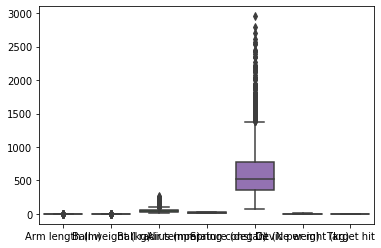

In [12]:
ax = sns.boxplot(data = df)
df.columns